In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import sparql_dataframe
from tabulate import tabulate



In [2]:
endpoint = "https://api.druid.datalegend.net/datasets/LvanWissen/Occasional-Poetry/services/Occasional-Poetry/sparql"

## Welke predicaten zitten er in de GGD database?

In [3]:
q = """
SELECT ?p (COUNT(?p) AS ?count)
WHERE {
    ?s ?p ?o.
  }
ORDER BY DESC(?count)
"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))



+----+-------------------------------------------------------------------+---------+
|    | p                                                                 |   count |
+====+===================================================================+=========+
|  0 | http://www.w3.org/1999/02/22-rdf-syntax-ns#type                   |  140050 |
+----+-------------------------------------------------------------------+---------+
|  1 | http://www.w3.org/2000/01/rdf-schema#label                        |  109107 |
+----+-------------------------------------------------------------------+---------+
|  2 | http://schema.org/name                                            |   79751 |
+----+-------------------------------------------------------------------+---------+
|  3 | https://w3id.org/pnv#hasName                                      |   42978 |
+----+-------------------------------------------------------------------+---------+
|  4 | http://schema.org/author                                  

## Hoeveel auteurs zitten er in de ggd?

In [16]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>

SELECT (COUNT(?author) AS ?count)
WHERE {
  ?s schema:publication ?publication;
  schema:author ?authorRole.
  ?authorRole schema:author ?author 
  }
ORDER BY DESC(?count)
"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))



+----+---------+
|    |   count |
+====+=========+
|  0 |   14910 |
+----+---------+


Of via een andere weg:

In [5]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>

SELECT (COUNT(?author) AS ?count)
WHERE {
    ?book a schema:Book ;
    schema:author ?authorRole .

    ?authorRole a schema:Role ;
    schema:author ?author .

    ?author a schema:Person .
    }
ORDER BY DESC(?count)
"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))




+----+---------+
|    |   count |
+====+=========+
|  0 |   14910 |
+----+---------+


Maar daar kunnen best wat dubbeltellingen bij zitten. Laten we die eruithalen.

In [17]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>

SELECT (COUNT(DISTINCT ?ID) AS ?count)
WHERE {
  ?work schema:publication ?publication;
  schema:author ?author.
  ?author w3ID:hasName ?ID.  
  }
"""

df = sparql_dataframe.get(endpoint, q)


print(tabulate(df, headers='keys', tablefmt='grid'))



+----+---------+
|    |   count |
+====+=========+
|  0 |    6942 |
+----+---------+


## Hoeveel van die auteurs hebben een link in de NTA?


Dit is te onderscheiden doordat ze "thes" in hun URI hebben ("thes"  staat voor "thesaurus").\

<span style="color:red">Ik kom hier op 2620 uit en dat is volgens mij een veel lager getal dan ik meen gehoord te hebben. Doe ik iets fout?</span>.

In [10]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>


SELECT  (COUNT(DISTINCT ?author) AS ?count)
WHERE {
  ?work schema:publication ?publication;
  schema:author ?authorRole.
  ?authorRole schema:author ?author.
  FILTER(CONTAINS(STR(?author), 'thes'))
  }

"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))



+----+---------+
|    |   count |
+====+=========+
|  0 |    2620 |
+----+---------+


Of via een andere route:

In [13]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>


SELECT  (COUNT(DISTINCT ?author) AS ?count)
WHERE {
    ?book a schema:Book ;
    schema:author ?authorRole .
    ?authorRole a schema:Role ;
    schema:author ?author .
    ?author a schema:Person .
    FILTER(CONTAINS(STR(?author), 'thes'))
  }

"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))




+----+---------+
|    |   count |
+====+=========+
|  0 |    2620 |
+----+---------+


## Hoeveel van die auteurs hebben een UvA URI?

In [42]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>


SELECT  (COUNT(DISTINCT ?author) AS ?count)
WHERE {
  ?work schema:publication ?publication;
  schema:author ?authorRole.
  ?authorRole schema:author ?author.
  FILTER(CONTAINS(STR(?author), 'uva'))
  }

"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))



+----+---------+
|    |   count |
+====+=========+
|  0 |    4257 |
+----+---------+


## En hoeveel via viaf?

In [43]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>


SELECT  (COUNT(DISTINCT ?author) AS ?count)
WHERE {
  ?work schema:publication ?publication;
  schema:author ?authorRole.
  ?authorRole schema:author ?author.
  FILTER(CONTAINS(STR(?author), 'viaf'))
  }

"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))



+----+---------+
|    |   count |
+====+=========+
|  0 |      65 |
+----+---------+


## Hoe vaak is een auteur mannelijk of vrouwelijk?

Laten we eerst kijken naar alle boeken die in de GGD zitten. Als een boek er dan twee keer in zit, worden de auteurs twee keer meegeteld.

In [31]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>

SELECT ?gender (COUNT(?gender) as ?count)
WHERE {
  ?book a schema:Book;
  schema:author ?authorRole.

  ?authorRole schema:author ?author.
  
  ?author schema:gender ?gender.

  }
ORDER BY DESC(?count)
"""

df_gender = sparql_dataframe.get(endpoint, q)

print(tabulate(df_gender, headers='keys', tablefmt='grid'))



+----+--------------------------+---------+
|    | gender                   |   count |
+====+==========================+=========+
|  0 | http://schema.org/Male   |   11071 |
+----+--------------------------+---------+
|  1 | http://schema.org/Female |     795 |
+----+--------------------------+---------+


Hoe ziet het eruit als je naar unieke werken kijkt?

<span style="color:red">Hoe kan het dat ik hier op een hoger aantal uitkom?</span>.

In [34]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>

SELECT ?gender (COUNT(?gender) as ?count)
WHERE {
  ?copy schema:exampleOfWork ?work.
  
  ?work schema:author ?authorRole.

  ?authorRole schema:author ?author.

  ?author schema:gender ?gender.

  }
ORDER BY DESC(?count)
"""

df_gender = sparql_dataframe.get(endpoint, q)

print(tabulate(df_gender, headers='keys', tablefmt='grid'))



+----+--------------------------+---------+
|    | gender                   |   count |
+====+==========================+=========+
|  0 | http://schema.org/Male   |   15334 |
+----+--------------------------+---------+
|  1 | http://schema.org/Female |    1017 |
+----+--------------------------+---------+


Nu kijken naar unieke auteurs.

In [54]:
q = """
PREFIX schema: <http://schema.org/>   
PREFIX w3: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX w3ID: <https://w3id.org/pnv#>

SELECT DISTINCT ?author ?gender
WHERE {
  ?book a schema:Book;
  schema:author ?authorRole.

  ?authorRole schema:author ?author.
  
  ?author schema:gender ?gender.

  }
ORDER BY DESC(?count)
"""

df_gender = sparql_dataframe.get(endpoint, q)

print(tabulate(df_gender, headers='keys', tablefmt='grid'))



+------+----------------------------------------------------------+--------------------------+
|      | author                                                   | gender                   |
+======+==========================================================+==========================+
|    0 | http://data.bibliotheken.nl/id/thes/p068191960           | http://schema.org/Male   |
+------+----------------------------------------------------------+--------------------------+
|    1 | http://data.bibliotheken.nl/id/thes/p068192983           | http://schema.org/Male   |
+------+----------------------------------------------------------+--------------------------+
|    2 | http://data.bibliotheken.nl/id/thes/p06824357X           | http://schema.org/Male   |
+------+----------------------------------------------------------+--------------------------+
|    3 | http://data.bibliotheken.nl/id/thes/p068381700           | http://schema.org/Male   |
+------+------------------------------------------

In [57]:
gender_count = df_gender.groupby(['gender']).size()
print(gender_count)


gender
http://schema.org/Female     493
http://schema.org/Male      3739
dtype: int64


## Volledigheid van ggd

In [65]:
q = """
PREFIX sc: <http://purl.org/science/owl/sciencecommons/>
PREFIX schema: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX sem: <http://semanticweb.cs.vu.nl/2009/11/sem/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?work (COUNT(?work) as ?count)
 WHERE {
  ?book a schema:Book;
  schema:exampleOfWork ?work.
} 
ORDER BY DESC(?count)
"""

df = sparql_dataframe.get(endpoint, q)

print(tabulate(df, headers='keys', tablefmt='grid'))




+------+-------------------------------------------------+---------+
|      | work                                            |   count |
+======+=================================================+=========+
|    0 | http://data.bibliotheken.nl/id/dataset/ggd/4047 |       9 |
+------+-------------------------------------------------+---------+
|    1 | http://data.bibliotheken.nl/id/dataset/ggd/2690 |       6 |
+------+-------------------------------------------------+---------+
|    2 | http://data.bibliotheken.nl/id/dataset/ggd/3104 |       6 |
+------+-------------------------------------------------+---------+
|    3 | http://data.bibliotheken.nl/id/dataset/ggd/5682 |       6 |
+------+-------------------------------------------------+---------+
|    4 | http://data.bibliotheken.nl/id/dataset/ggd/5660 |       6 |
+------+-------------------------------------------------+---------+
|    5 | http://data.bibliotheken.nl/id/dataset/ggd/5510 |       6 |
+------+--------------------------

In [69]:
from copia.utils import basic_stats

abundance = df['count'].to_numpy()
print(basic_stats(abundance))

{'f1': 5620, 'f2': 1003, 'f3': 213, 'f4': 43, 'S': 6906, 'n': 8582}


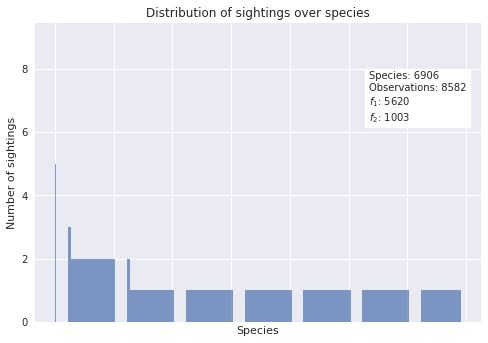

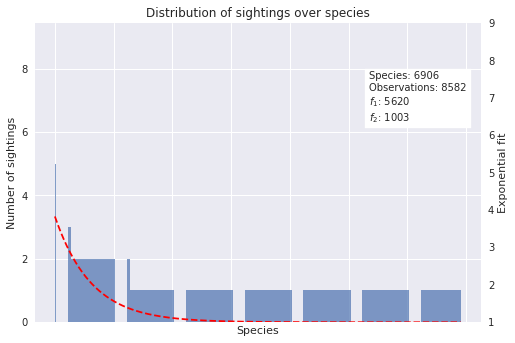

In [70]:
from copia.plot import abundance_counts
abundance_counts(abundance)
abundance_counts(abundance, trendline=True)

In [72]:
from copia.richness import *
for m in ('chao1', 'ichao1', 'ace', 'jackknife', 'egghe_proot'):
    print(m, '->', diversity(abundance, method=m, CI = True))

100%|██████████| 1000/1000 [00:00<00:00, 1612.17it/s]


chao1 -> {'richness': 22649.130454825223, 'lci': 21634.328133877054, 'uci': 23570.955204116315, 'std': 484.2174938820321, 'bootstrap': array([22401.52771979, 22012.16452548, 22563.6319214 , 23081.74335919,
       23041.65239124, 22351.70297366, 22130.54030991, 22964.13796401,
       23142.84221969, 22653.52857332, 21457.43113171, 22671.57650218,
       22543.33450094, 22061.15543732, 22311.13085401, 22834.98157973,
       22780.66872276, 22719.91381936, 22695.71322247, 22259.2110563 ,
       22808.82063896, 22400.11010651, 22921.37077171, 22352.24226073,
       22159.83502326, 23047.91592967, 22483.04373839, 23109.0494533 ,
       22156.8131661 , 22245.26795119, 22320.11255935, 23108.69199694,
       22014.01784003, 23180.4594266 , 22805.0192777 , 22934.81059692,
       22761.45650136, 22501.64613402, 22967.57634773, 22438.73538141,
       23206.42024626, 21923.8624567 , 22052.5383309 , 22614.81392298,
       22134.69889908, 21332.26460838, 21601.73470232, 21886.03636483,
       22685.

100%|██████████| 1000/1000 [00:00<00:00, 1086.22it/s]


ichao1 -> {'richness': 26532.44934341365, 'lci': 25423.219648571376, 'uci': 27722.169318929926, 'std': 594.5388271743353, 'bootstrap': array([26694.00105849, 27819.64144527, 26556.36488633, 26562.4591735 ,
       26583.86430197, 27164.51781686, 27123.39147268, 26504.48151588,
       26854.79663443, 25951.0001495 , 27176.44110831, 25196.16771747,
       27562.32074079, 26805.12582182, 26395.42336084, 25638.09927613,
       26271.91037922, 25523.0057711 , 26462.33385805, 26634.70518912,
       26172.3437889 , 26868.12519909, 26269.86923925, 27083.16491983,
       28156.67322683, 26315.79095033, 26585.08378953, 26963.51876073,
       26665.98640821, 26204.33378627, 26457.65452364, 26502.80083951,
       27197.18964317, 25712.04304444, 26852.42923256, 27346.70432215,
       25880.56851062, 25554.65992324, 25833.53685954, 26829.60210583,
       25253.14651918, 26397.58563527, 26693.50610089, 27213.59911117,
       26849.91189382, 25783.77723704, 26796.49611009, 25731.05725483,
       25971.

100%|██████████| 1000/1000 [00:02<00:00, 398.97it/s]


ace -> {'richness': 57978.453636563194, 'lci': 51311.67432757812, 'uci': 65323.94077851185, 'std': 3660.7019410884272, 'bootstrap': array([57352.67488103, 52432.20595272, 63447.49143998, 61877.94177302,
       60045.2946651 , 57493.56714971, 51169.84144632, 59931.33455922,
       57754.76023091, 59822.20357287, 59707.6575152 , 57402.34070332,
       51116.01959025, 56562.46432872, 61877.94177302, 55868.8998445 ,
       59466.91609678, 59322.92477477, 64709.35903653, 60335.93947477,
       56076.36893023, 53567.91987415, 58321.68283272, 58179.59867121,
       56911.3998189 , 53687.4233476 , 59202.68417425, 52365.88779696,
       56007.15556824, 65123.64334807, 61387.88085043, 59622.76807987,
       55749.0740576 , 60795.34412639, 57655.8416205 , 54634.77995808,
       58938.59131443, 53702.57215365, 68567.18758778, 57141.77429701,
       53754.73261805, 51693.42587162, 51837.27842635, 53552.96956491,
       54634.77995808, 58366.10266093, 54719.52228243, 56007.15556824,
       55404.477

100%|██████████| 1000/1000 [00:00<00:00, 1657.29it/s]

egghe_proot -> {'richness': 22900.949871930974, 'lci': 21931.110314230686, 'uci': 24053.78672268389, 'std': 543.50682184938, 'bootstrap': array([22653.62362854, 22429.83712723, 22036.71498545, 22731.10111974,
       22125.50868634, 22180.94491239, 22314.88420334, 23718.19530701,
       21983.85408884, 23423.76212264, 22400.78361258, 22858.6905712 ,
       22934.69034665, 23417.39531949, 23061.59819005, 22890.00355736,
       22384.70871872, 22448.01670655, 23320.75699737, 22523.23157063,
       23756.92070901, 22910.43763248, 22766.66585625, 23439.52167528,
       22517.79651986, 22322.37841251, 21888.74060873, 23576.87807714,
       23235.62194648, 23214.19551945, 23523.48206619, 24102.24257677,
       22862.18362422, 22520.69864814, 23036.81060126, 22480.63653698,
       22833.19268715, 23430.1054843 , 23854.93113515, 22287.09249396,
       23062.6600948 , 22418.3957938 , 22980.39226889, 23624.52062214,
       22201.72616647, 23475.28025778, 23190.7013256 , 22642.77083132,
       222